<a href="https://colab.research.google.com/github/VictorPabloCristina/DataSet-Proyecto-F-CH/blob/main/Seleccion_DataSet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet Mundial
Creacion de Juego 
En la creacion de un video juego de deportes, nos solicitan crear 3 niveles de dificultad para partidos contra la maquina (facil, medio, dificil) dependiando de las habilidades y resultados reales de los jugadores inscriptos en la FIFA del ultimo mundial Qatar 2022

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Datasets/FIFA22_official_data.csv")
print=(df.shape)
df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [11]:
df.columns #definimos los datos mas relevantes de cada jugador par nuestro problema

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

'ID','Name', 'Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling', 'Curve','FKAccuracy','LongPassing', 'BallControl', 'Acceleration','SprintSpeed','Agility','Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength','LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties', 'Best Position', 'Best Overall Rating',

In [15]:
df[['ID','Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
          'Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength'
          ,'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position'
          ,'Best Overall Rating',]]#.describe()

,ID,Name,Age,Potential,Skill Moves,Position,Jersey Number,ShortPassing,Volleys,Dribbling,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Best Position,Best Overall Rating
0,212198,Bruno Fernandes,26,89,4.0,"<span class=""pos pos18"">CAM",18.0,91.0,87.0,83.0,...,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,CAM,88.0
1,209658,L. Goretzka,26,88,3.0,"<span class=""pos pos11"">LDM",8.0,86.0,69.0,84.0,...,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,CM,87.0
2,176580,L. Suárez,34,88,3.0,"<span class=""pos pos24"">RS",9.0,83.0,90.0,83.0,...,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,ST,88.0
3,192985,K. De Bruyne,30,91,4.0,"<span class=""pos pos13"">RCM",17.0,94.0,82.0,88.0,...,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,CM,91.0
4,224334,M. Acuña,29,84,4.0,"<span class=""pos pos7"">LB",19.0,82.0,68.0,87.0,...,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,LB,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,70,1.0,"<span class=""pos pos29"">RES",31.0,18.0,7.0,12.0,...,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,GK,52.0
16706,262846,�. Dobre,20,63,1.0,"<span class=""pos pos29"">RES",1.0,17.0,7.0,6.0,...,24.0,32.0,6.0,18.0,13.0,8.0,33.0,12.0,GK,53.0
16707,241317,21 Xue Qinghao,19,60,1.0,"<span class=""pos pos29"">RES",31.0,15.0,6.0,8.0,...,20.0,51.0,8.0,13.0,11.0,7.0,18.0,15.0,GK,47.0
16708,259646,A. Shaikh,18,67,1.0,"<span class=""pos pos28"">SUB",31.0,22.0,8.0,10.0,...,19.0,34.0,5.0,24.0,6.0,6.0,31.0,19.0,GK,47.0


In [16]:
df[['ID','Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
          'Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength'
          ,'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position'
          ,'Best Overall Rating',]].describe()

,ID,Age,Potential,Skill Moves,Jersey Number,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Best Overall Rating
count,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,...,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16702.000000,16702.000000,16673.000000,16710.000000,16710.000000
mean,220560.467923,25.727409,72.572292,2.475464,20.458643,61.314423,45.652972,58.591203,50.574522,45.074087,...,65.896659,64.204548,66.266008,49.989228,57.955536,48.057418,53.150461,56.378936,50.615919,68.565410
std,38496.607959,5.048910,5.688085,0.791414,17.699813,13.665353,17.828225,17.925005,18.237536,17.596471,...,12.285499,15.575110,12.624115,19.082943,16.855790,20.846484,19.204880,13.415572,15.756832,6.256253
min,27.000000,16.000000,38.000000,1.000000,1.000000,8.000000,4.000000,5.000000,6.000000,4.000000,...,22.000000,13.000000,18.000000,4.000000,11.000000,4.000000,3.000000,10.000000,7.000000,36.000000
25%,203891.250000,22.000000,69.000000,2.000000,8.000000,57.000000,33.000000,54.000000,39.000000,33.000000,...,59.000000,57.000000,59.000000,37.000000,47.000000,28.000000,44.000000,48.000000,41.000000,65.000000
50%,229253.000000,25.000000,72.000000,2.000000,17.000000,64.000000,48.000000,63.500000,53.000000,44.000000,...,67.000000,67.000000,68.000000,55.000000,61.000000,55.000000,58.000000,58.000000,52.000000,68.000000
75%,245368.750000,29.000000,76.000000,3.000000,27.000000,70.000000,59.000000,70.000000,64.000000,59.000000,...,74.000000,75.000000,75.000000,65.000000,71.000000,65.000000,67.000000,66.000000,62.000000,73.000000
max,264704.000000,54.000000,95.000000,5.000000,99.000000,94.000000,90.000000,96.000000,94.000000,94.000000,...,95.000000,97.000000,97.000000,94.000000,95.000000,95.000000,96.000000,95.000000,96.000000,93.000000


In [34]:
df[['ID','Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
          'Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength'
          ,'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position'
          ,'Best Overall Rating',]].median()

<ipython-input-34-39d049e29f23>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[['ID','Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',


ID                     229253.0
Age                        25.0
Potential                  72.0
Skill Moves                 2.0
Jersey Number              17.0
ShortPassing               64.0
Volleys                    48.0
Dribbling                  63.5
Curve                      53.0
FKAccuracy                 44.0
LongPassing                58.0
BallControl                65.0
Acceleration               68.0
SprintSpeed                68.0
Agility                    68.0
Balance                    67.0
ShotPower                  62.0
Jumping                    67.0
Stamina                    67.0
Strength                   68.0
LongShots                  55.0
Aggression                 61.0
Interceptions              55.0
Positioning                58.0
Vision                     58.0
Penalties                  52.0
Best Overall Rating        68.0
dtype: float64

In [54]:
df[['Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
          'Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength'
          ,'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position'
          ,'Best Overall Rating' ]].quantile([0.05, 0.5, 0.99])


,Age,Potential,Skill Moves,Jersey Number,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Best Overall Rating
0.05,18.0,64.0,1.0,2.0,28.0,12.0,14.0,14.0,13.0,26.0,...,43.0,30.0,42.0,13.0,25.0,14.0,11.0,31.0,19.0,58.0
0.50,25.0,72.0,2.0,17.0,64.0,48.0,63.5,53.0,44.0,58.0,...,67.0,67.0,68.0,55.0,61.0,55.0,58.0,58.0,52.0,68.0
0.99,38.0,86.0,4.0,94.0,84.0,79.0,84.0,83.0,81.0,81.0,...,90.0,91.0,91.0,81.0,87.0,82.0,83.0,82.0,82.0,84.0


(array([1.000e+00, 4.000e+00, 1.600e+01, 1.680e+02, 2.169e+03, 6.099e+03,
        5.115e+03, 2.600e+03, 5.010e+02, 3.700e+01]),
 array([38. , 43.7, 49.4, 55.1, 60.8, 66.5, 72.2, 77.9, 83.6, 89.3, 95. ]),
 <BarContainer object of 10 artists>)

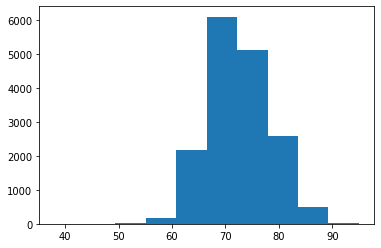

In [67]:
plt.hist(df["Potential"])